In [1]:
reg_path = "/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINVG5M25E6R_ses-baselineYear1Arm1_task-sst_run-01LN.feat/filtered_func_data_LN.nii.gz"

mask_path = "grantmask_labeled.nii"

In [2]:
import numpy as np
from nilearn.image import load_img

nifti_image = load_img(reg_path)

nifti_data = nifti_image.get_fdata()

mask_image = load_img(mask_path)

mask_data = mask_image.get_fdata()

In [3]:
roi_num = 1

roi_mask_indices = np.argwhere(mask_data == roi_num)    

roi_mask_indices = [tuple(x) for x in roi_mask_indices]

roi_mask_indices[:4]

[(58, 75, 37), (59, 73, 36), (59, 73, 37), (59, 73, 38)]

In [4]:
nifti_data.shape

(91, 109, 91, 437)

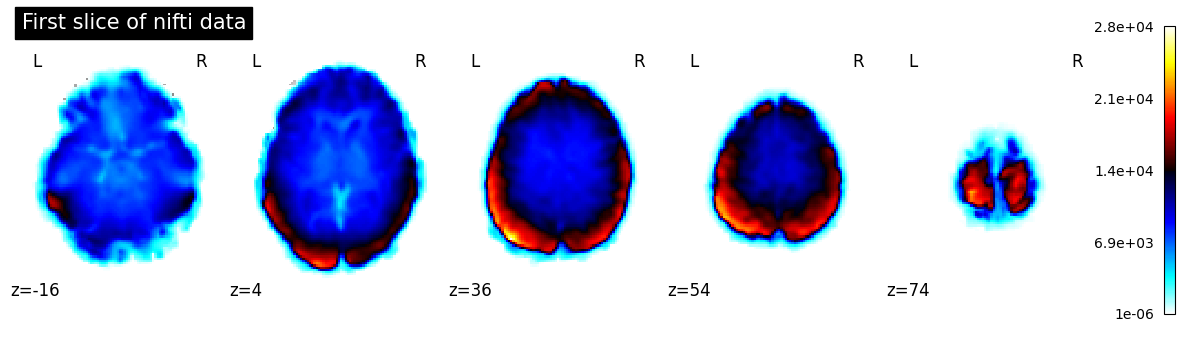

In [5]:
from nilearn.image import index_img
from nilearn.plotting import plot_stat_map

plot_stat_map(index_img(nifti_image, 0), display_mode='z', cut_coords=5, title="First slice of nifti data")

In [16]:
import pandas as pd

roi_nums = range(1, 12)  # 11 ROIs, numbered 1-11

data_list = []

for roi_num in roi_nums:            
    roi_mask_indices = np.argwhere(mask_data == roi_num)

    print(f"ROI {roi_num} has {len(roi_mask_indices)} voxels")

    for time_index in range(nifti_data.shape[3]):
        for (xi, yi, zi) in roi_mask_indices:
            value = nifti_data[xi, yi, zi, time_index]
            data_list.append({'x': xi, 'y': yi, 'z': zi, 'value': value, 'roi_num': roi_num, 'time_index': time_index})


df = pd.DataFrame(data_list)


# df.to_csv('fmri_roi_data.csv', index=False)

df

ROI 1 has 123 voxels
ROI 2 has 123 voxels
ROI 3 has 123 voxels
ROI 4 has 123 voxels
ROI 5 has 123 voxels
ROI 6 has 123 voxels
ROI 7 has 123 voxels
ROI 8 has 123 voxels
ROI 9 has 123 voxels
ROI 10 has 123 voxels
ROI 11 has 123 voxels


,x,y,z,value,roi_num,time_index
0,58,75,37,9369.085938,1,0
1,59,73,36,8988.434570,1,0
2,59,73,37,8954.359375,1,0
3,59,73,38,8994.848633,1,0
4,59,74,35,9160.578125,1,0
...,...,...,...,...,...,...
591256,45,72,63,9958.297852,11,436
591257,45,73,60,9533.753906,11,436
591258,45,73,61,9765.402344,11,436
591259,45,73,62,9858.655273,11,436


In [19]:
def get_filtered_func_paths():
    path = "linear_feat_linear_reg.txt"
    
    # each line has one path
    with open(path) as f:
        paths = f.readlines()
    
    print(f"read {len(paths)} paths")    
    
    paths = [p.strip() for p in paths]
    return paths
    
paths = get_filtered_func_paths()

paths[:5]

read 471 paths


['/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task-sst_run-01LN.feat/filtered_func_data_LN.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00HEV6HB_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00J52GPG_ses-baselineYear1Arm1_task-sst_run-01LN.feat/filtered_func_data_LN.nii.gz',
 '/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00J52GPG_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz']

In [24]:
import regex as re

filtered_func_paths = get_filtered_func_paths()

mask_data = mask_image.get_fdata()

def get_full_df(filtered_func_path: str):
    roi_nums = range(1, 12)  # 11 ROIs, numbered 1-11

    nifti_image = load_img(filtered_func_path)
    
    nifti_data = nifti_image.get_fdata()

    data_list = []
    
    subj_regex = r"sub-([^_/]+)" # match 'sub-' and any non-delimter characters ('_' or '/')
    run_regex = r"run-([\d]+)"    # 'run-' and any digits    
    session_regex = r"ses-([^_/]+)" # 'ses-' and any non-delimter characters ('_' or '/')
    
    # Extract the subject, run, and session from the input nifti path
    subj_match = re.search(subj_regex, filtered_func_path)
    run_match = re.search(run_regex, filtered_func_path)    
    session_match = re.search(session_regex, filtered_func_path)
    
    subject_id = subj_match.group(1) if subj_match else None
    run = int(run_match.group(1)) if run_match else None
    session = session_match.group(1) if session_match else None

    for roi_num in roi_nums:            
        roi_mask_indices = np.argwhere(mask_data == roi_num)

        # print(f"ROI {roi_num} has {len(roi_mask_indices)} voxels")

        for time_index in range(nifti_data.shape[3]):
            for (xi, yi, zi) in roi_mask_indices:
                value = nifti_data[xi, yi, zi, time_index]
                data_list.append({'x': xi, 
                                  'y': yi, 
                                  'z': zi, 
                                  'value': value, 
                                  'roi_num': roi_num, 
                                  'time_index': time_index, 
                                  'subid': subject_id,
                                  'run': run,
                                  'session': session,
                                  })

    return pd.DataFrame(data_list)

all_dfs = []

for path in filtered_func_paths[:10]:
    df = get_full_df(path)
    print(f"processed {path}")
    all_dfs.append(df)
    

combined = pd.concat(all_dfs)

combined.to_csv(f'roi_timeseries_n-{len(all_dfs)}.csv', index=False)

read 471 paths
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task-sst_run-01LN.feat/filtered_func_data_LN.nii.gz
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00CY2MDM_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00HEV6HB_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00J52GPG_ses-baselineYear1Arm1_task-sst_run-01LN.feat/filtered_func_data_LN.nii.gz
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00J52GPG_ses-baselineYear1Arm1_task-sst_run-02LN.feat/filtered_func_data_LN.nii.gz
processed /mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-NDARINV00LH735Y_ses-baselineYear1Arm1_task-sst_run-01LN

In [27]:
zero_df = combined[combined['value'] == 0]

print(zero_df["subid"].unique())

print(zero_df["run"].unique())

['NDARINV00UMK5VC']
[1]


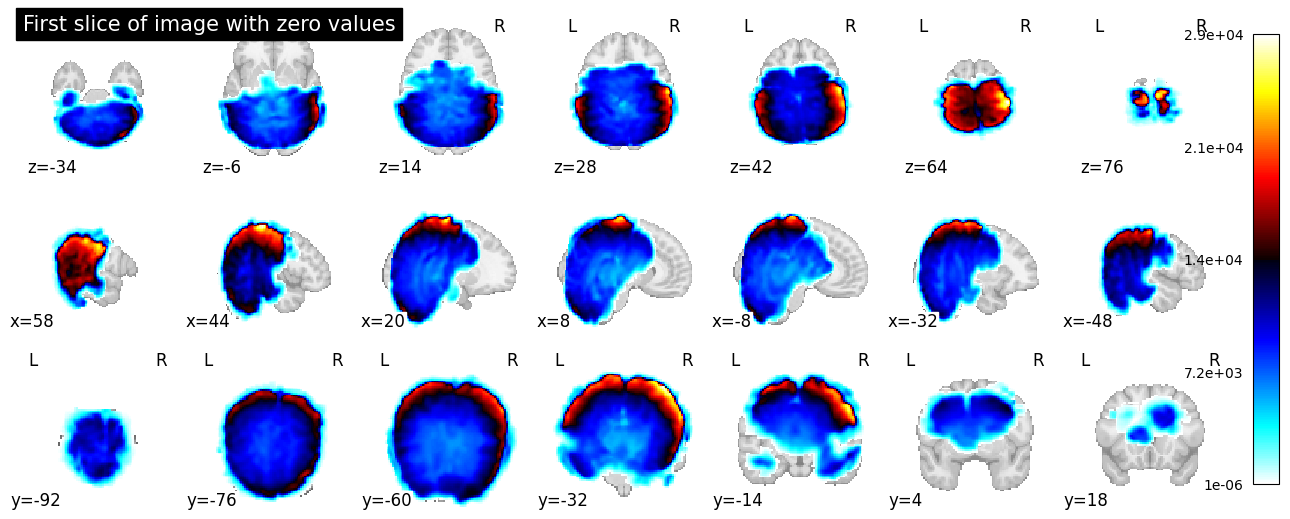

In [31]:
subid = "NDARINV00UMK5VC"
run = 1

path = f"/mnt/storage/daniel/feat-preprocess-datasink/additional_150_subjs/sub-{subid}_ses-baselineYear1Arm1_task-sst_run-{run:02}LN.feat/filtered_func_data_LN.nii.gz"

img = load_img(path)

plot_stat_map(index_img(img, 0), display_mode="mosaic", title="First slice of image with zero values")


In [34]:
print(combined["subid"].nunique())
combined[combined['subid'] != "NDARINV00UMK5VC"]["subid"].nunique()

6


5

In [35]:
# removing faulty sub/run

combined[combined['subid'] != "NDARINV00UMK5VC"].to_csv(f'roi_timeseries_n-5.csv', index=False)